In [1]:
import pandas as pd
from sqlalchemy import create_engine
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import pyplot
import random
import json
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns
from pandas.plotting import parallel_coordinates

In [2]:
db_username_0 = 'simulationuser'
db_password_0 = 'simulations2024'
db_host_0 = 'localhost'
db_port_0 = '5432'
db_name_0 = 'simulations_data'
table_name_0 = 'composite_data'

In [3]:
connection_string = f"postgresql://{db_username_0}:{db_password_0}@{db_host_0}:{db_port_0}/{db_name_0}"
engine = create_engine(connection_string)
query = f"SELECT * FROM {table_name_0}"
df = pd.read_sql(query, engine)

In [4]:
df.head()

,id,eps,n_0_squared,psi_e,b_e,psi_plus,b_plus,u_list,r_list,k_e_psi_e_list,k_e_b_e_list,k_e_psi_plus_list,k_e_b_plus_list,heat_flux_psi_e_b_e_list,heat_flux_psi_e_b_plus_list,b_e_psi_plus_list,b_e_b_plus_list,psi_plus_b_plus_list,eta_list
0,1500,0.123943,318.864022,"[-0.011744609035812982, -0.011215305626181015,...","[-5.517162102724528, -3.1920707854231463, -0.9...","[-0.0016475367466768115, -0.002355776502265530...","[10.73076649947905, 10.77581128940965, 10.5402...","[0.4615413218450946, 0.4686702377764153, 0.478...","[0.6551578220909112, 0.8945764375320215, 1.175...","[0.00013793584140409996, 0.0001257830802886475...","[30.43907766773974, 10.189315899151941, 0.8663...","[2.7143773316504123e-06, 5.549682928626416e-06...","[115.14934966634185, 116.11810894496844, 111.0...","[0.06479691188370344, 0.035800049438924265, 0....","[-0.1260286571909809, -0.12085401698078094, -0...","[0.009089727301611367, 0.007519805349868124, 0...","[-59.203378264111755, -34.39715240615747, -9.8...","[-0.01767933212790023, -0.025385403028438877, ...","[[1.0369206541904592], [-1.6813054180526377], ..."
1,1501,0.123943,318.864022,"[-0.008147157474100065, -0.008292099833020762,...","[-0.832904729882089, 0.14071461474575664, 1.27...","[0.0006807256129005129, 0.0007313699095774325,...","[-0.7190970906032216, -0.6095182673572732, -0....","[0.23703131704960073, 0.23479400902756253, 0.2...","[-0.18778048603775238, -0.2053401462453807, -0...","[6.637617490778455e-05, 6.875891964078295e-05,...","[0.6937302890599556, 0.019800602803046713, 1.6...","[4.6338736005877887e-07, 5.349019446353018e-07...","[0.5171006257140178, 0.3715125182422124, 0.293...","[0.006785805995272157, -0.0011668196334368695,...","[0.005858597236311648, 0.005054186322976349, 0...","[-0.0005669795827367211, 0.0001029144350628272...","[0.5989393680078723, -0.0857681281716798, -0.6...","[-0.0004895078077358536, -0.000445783320082882...","[[1.418213787060706], [0.8827834628841255], [0..."
2,1502,0.123943,318.864022,"[-0.003781434990007615, -0.001308768972368787,...","[7.429632504232679, 7.616174400779771, 7.45893...","[0.0017201097552821953, 0.0016973192181066884,...","[0.26192796713213556, -0.016191321040263613, -...","[0.3398928494975913, 0.33847860008307173, 0.33...","[-0.22023434840890527, -0.0752140155360062, 0....","[1.4299250583653892e-05, 1.7128762230352505e-0...","[55.199439147950756, 58.00611250309311, 55.635...","[2.958777570216974e-06, 2.8808925281543e-06, 2...","[0.06860625996597308, 0.0002621588770288832, 0...","[-0.028094672314403355, -0.009967812743890003,...","[-0.000990463579775022, 2.1190698599158928e-05...","[0.012779783348692317, 0.012927079178895698, 0...","[1.9460285383725033, -0.12331592482166262, -2....","[0.00045054485144522063, -2.7481840368174608e-...","[[-0.6679438799496836], [-0.8041216677662598],..."
3,1503,0.123943,318.864022,"[-0.008102021680746106, -0.007577287179778589,...","[-13.405475487140006, -12.142974722866745, -10...","[-0.007065355563569785, -0.007211423776971252,...","[3.432058579711073, 2.9279736455346024, 2.4210...","[0.15021463519080008, 0.17082991418834997, 0.1...","[1.9382048681079675, 1.850150346137473, 2.4148...","[6.564275531527996e-05, 5.7415281004836965e-05...","[179.70677303631157, 147.4518351201807, 119.05...","[4.991924923966652e-05, 5.2004632891066315e-05...","[11.779026094568387, 8.573029668945189, 5.8616...","[0.10861145303751879, 0.09201080669195365, 0.1...","[-0.0278066130224098, -0.022186097167038923, -...","[0.09471445081536302, 0.08756813663964214, 0.0...","[-46.00837716074533, -35.55430996694667, -26.4...","[-0.024248714180659044, -0.021114858765753426,...","[[0.20668630436664126], [1.0343110874926529], ..."
4,1504,0.123943,318.864022,"[-0.0007052290130828054, -0.003475921446700475...","[7.188510348955567, 7.255315274332748, 7.40112...","[0.01155266108186768, 0.011468163968599393, 0....","[-0.9665805895951766, 0.23618988496103174, 1.4...","[0.1388431307750241, 0.13278906064134477, 0.12...","[-0.2758572865676108, -1.349696442983

In [5]:
m = 2 * np.pi * 3
m_u = 2 * np.pi * 7
k = 2 * np.pi * 6
k_e_square = k**2 + m**2
k_plus_square = k**2 + (m + m_u)**2
window_size = 5000
dt = .001
epsilon = 0.12394270273516043
N_0_squared = 318.8640217310387

In [6]:
def length_of_the_first_entry(series):
    return len(series.iloc[0])

selected_columns = df.iloc[:,3:]

lengths = selected_columns.apply(length_of_the_first_entry)
lengths

psi_e                          1000
b_e                            1000
psi_plus                       1000
b_plus                         1000
u_list                         1000
r_list                         1000
k_e_psi_e_list                 1000
k_e_b_e_list                   1000
k_e_psi_plus_list              1000
k_e_b_plus_list                1000
heat_flux_psi_e_b_e_list       1000
heat_flux_psi_e_b_plus_list    1000
b_e_psi_plus_list              1000
b_e_b_plus_list                1000
psi_plus_b_plus_list           1000
eta_list                       1000
dtype: int64

In [7]:
psi_e_total_pre_flip = []
b_e_total_pre_flip = []
psi_plus_total_pre_flip = []
b_plus_total_pre_flip = []
U_total_pre_flip = []

psi_e_total_dur_flip = []
b_e_total_dur_flip = []
psi_plus_total_dur_flip = []
b_plus_total_dur_flip = []
U_total_dur_flip = []

psi_e_total_post_flip = []
b_e_total_post_flip = []
psi_plus_total_post_flip = []
b_plus_total_post_flip = []
U_total_post_flip = []

In [8]:
for index, row in df.iterrows():
    psi_e_list_pre_flip = row['psi_e'][0:400]
    b_e_list_pre_flip = row['b_e'][0:400]
    psi_plus_list_pre_flip = row['psi_plus'][0:400]
    b_plus_list_pre_flip = row['b_plus'][0:400]
    U_list_pre_flip = row['u_list'][0:400]

    psi_e_list_dur_flip = row['psi_e'][400:600]
    b_e_list_dur_flip = row['b_e'][400:600]
    psi_plus_list_dur_flip = row['psi_plus'][400:600]
    b_plus_list_dur_flip = row['b_plus'][400:600]
    U_list_dur_flip = row['u_list'][400:600]

    psi_e_list_post_flip = row['psi_e'][600:1000]
    b_e_list_post_flip = row['b_e'][600:1000]
    psi_plus_list_post_flip = row['psi_plus'][600:1000]
    b_plus_list_post_flip = row['b_plus'][600:1000]
    U_list_post_flip = row['u_list'][600:1000]

    psi_e_total_pre_flip.extend(psi_e_list_pre_flip)
    b_e_total_pre_flip.extend(b_e_list_pre_flip)
    psi_plus_total_pre_flip.extend(psi_plus_list_pre_flip)
    b_plus_total_pre_flip.extend(b_plus_list_pre_flip)
    U_total_pre_flip.extend(U_list_pre_flip)

    psi_e_total_dur_flip.extend(psi_e_list_dur_flip)
    b_e_total_dur_flip.extend(b_e_list_dur_flip)
    psi_plus_total_dur_flip.extend(psi_plus_list_dur_flip)
    b_plus_total_dur_flip.extend(b_plus_list_dur_flip)
    U_total_dur_flip.extend(U_list_dur_flip)

    psi_e_total_post_flip.extend(psi_e_list_post_flip)
    b_e_total_post_flip.extend(b_e_list_post_flip)
    psi_plus_total_post_flip.extend(psi_plus_list_post_flip)
    b_plus_total_post_flip.extend(b_plus_list_post_flip)
    U_total_post_flip.extend(U_list_post_flip)


In [9]:
psi_e_total_pre_flip = np.array(psi_e_total_pre_flip)
b_e_total_pre_flip = np.array(b_e_total_pre_flip)
psi_plus_total_pre_flip= np.array(psi_plus_total_pre_flip)
b_plus_total_pre_flip =  np.array(b_plus_total_pre_flip)
U_total_pre_flip = np.array(U_total_pre_flip)

psi_e_total_dur_flip = np.array(psi_e_total_dur_flip)
b_e_total_dur_flip = np.array(b_e_total_dur_flip)
psi_plus_total_dur_flip= np.array(psi_plus_total_dur_flip)
b_plus_total_dur_flip =  np.array(b_plus_total_dur_flip)
U_total_dur_flip = np.array(U_total_dur_flip)

psi_e_total_post_flip = np.array(psi_e_total_post_flip)
b_e_total_post_flip = np.array(b_e_total_post_flip)
psi_plus_total_post_flip= np.array(psi_plus_total_post_flip)
b_plus_total_post_flip =  np.array(b_plus_total_post_flip)
U_total_post_flip = np.array(U_total_post_flip)

In [10]:

print(len(psi_e_total_pre_flip))
print(len(psi_e_total_dur_flip))
print(len(psi_e_total_post_flip))
    

4285600
2142800
4285600


In [11]:
psi_e = np.concatenate((psi_e_total_pre_flip, psi_e_total_dur_flip, psi_e_total_post_flip))
b_e = np.concatenate((b_e_total_pre_flip, b_e_total_dur_flip, b_e_total_post_flip))
psi_plus = np.concatenate((psi_plus_total_pre_flip, psi_plus_total_dur_flip, psi_plus_total_post_flip))
b_plus = np.concatenate((b_plus_total_pre_flip, b_plus_total_dur_flip, b_plus_total_post_flip))
u_list = np.concatenate((U_total_pre_flip, U_total_dur_flip, U_total_post_flip))

cluster = np.concatenate((np.zeros(len(psi_e_total_pre_flip)),
                          np.ones(len(psi_e_total_dur_flip)),
                          np.full(len(psi_e_total_post_flip), 2)))

In [12]:
df = pd.DataFrame({
    'psi_e': psi_e,
    'b_e': b_e,
    'psi_plus': psi_plus,
    'b_plus': b_plus,
    'u_list': u_list,
    'Cluster': cluster
})

In [13]:
df.head()

,psi_e,b_e,psi_plus,b_plus,u_list,Cluster
0,-0.011745,-5.517162,-0.001648,10.730766,0.461541,0.0
1,-0.011215,-3.192071,-0.002356,10.775811,0.468670,0.0
2,-0.011376,-0.930782,-0.003052,10.540208,0.478139,0.0
3,-0.006238,1.111849,-0.003719,10.029609,0.487596,0.0
4,-0.005910,2.717451,-0.004345,9.278920,0.495341,0.0


In [14]:
df['Cluster'] = df['Cluster'].astype(int)

# clusters = np.array(df['Cluster'])

clusters = df['Cluster']

clusters

0           0
1           0
2           0
3           0
4           0
           ..
10713995    2
10713996    2
10713997    2
10713998    2
10713999    2
Name: Cluster, Length: 10714000, dtype: int64

In [15]:
df.head()

,psi_e,b_e,psi_plus,b_plus,u_list,Cluster
0,-0.011745,-5.517162,-0.001648,10.730766,0.461541,0
1,-0.011215,-3.192071,-0.002356,10.775811,0.468670,0
2,-0.011376,-0.930782,-0.003052,10.540208,0.478139,0
3,-0.006238,1.111849,-0.003719,10.029609,0.487596,0
4,-0.005910,2.717451,-0.004345,9.278920,0.495341,0


In [16]:
df.iloc[4285599:, :]

,psi_e,b_e,psi_plus,b_plus,u_list,Cluster
4285599,0.006556,-2.696604,0.003282,-3.849148,0.363105,0
4285600,-0.007481,-16.291100,-0.004591,12.786643,0.336284,1
4285601,-0.007279,-14.492036,-0.005435,13.054755,0.347466,1
4285602,-0.005332,-12.665427,-0.006284,13.133212,0.360201,1
4285603,-0.005774,-10.962479,-0.007126,13.021289,0.372872,1
...,...,...,...,...,...,...
10713995,-0.008734,-6.833418,0.000805,-4.538073,-0.422365,2
10713996,-0.011195,-5.230044,0.001103,-4.868307,-0.425227,2
10713997,-0.012747,-3.259489,0.001409,-5.021467,-0.430350,2
10713998,-0.011741,-1.228787,0.001713,-4.977236,-0.436954,2


In [17]:
df = df.sample(frac=1).reset_index(drop=True)

In [18]:
data_combined_df = df
data_combined_df_no_label = data_combined_df.drop("Cluster", axis=1)
data_combined_df.groupby('Cluster').describe()

psi_e                                                    \
             count      mean       std       min       25%       50%   
Cluster                                                                
0        4285600.0 -0.000005  0.009773 -0.049195 -0.006718 -0.000004   
1        2142800.0  0.000004  0.015974 -0.053721 -0.012053 -0.000008   
2        4285600.0  0.000002  0.010201 -0.048615 -0.007030 -0.000005   

                                   b_e            ...    b_plus             \
              75%       max      count      mean  ...       75%        max   
Cluster                                           ...                        
0        0.006704  0.045552  4285600.0  0.011253  ...  2.858065  23.707263   
1        0.012070  0.054890  2142800.0  0.007118  ...  4.787223  30.521040   
2        0.007036  0.049248  4285600.0 -0.000841  ...  2.689999  23.656526   

            u_list                                                    \
             count      mean       std       min       25%       50%   
Cluster                                                                
0        4285600.0  0.340185  0.125009  0.000078  0.264372  0.337139   
1        2142800.0  0.055852  0.366249 -1.330089 -0.230450 -0.000003   
2        4285600.0 -0.313951  0.133285 -1.159943 -0.395176 -0.306067   

                             
              75%       max  
Cluster                      
0        0.414675  1.169443  
1        0.376837  1.234048  
2       -0.223262 -0.000007  

[3 rows x 40 columns]

In [19]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_combined_df_no_label)

In [20]:
pca = PCA()
data_pca = pca.fit_transform(data_scaled)
print("PCA components:")
print(pca.components_)

print("Explained variance by each component:")
print(pca.explained_variance_ratio_)

PCA components:
[[-5.28393701e-01  4.69087053e-01  5.66565713e-01 -4.23972211e-01
   2.87949334e-03]
 [-2.16316401e-01 -6.56677391e-01 -1.81287189e-01 -6.99290781e-01
  -1.04583797e-02]
 [-3.24981519e-03  8.77820892e-03  4.67105841e-04  7.59551756e-03
  -9.99927233e-01]
 [-7.14145783e-01  1.72087216e-01 -6.40044548e-01  2.25160560e-01
   5.24308331e-03]
 [ 4.04959938e-01  5.64837210e-01 -4.86293129e-01 -5.29608344e-01
  -6.07629973e-04]]
Explained variance by each component:
[0.24379315 0.2081142  0.19999909 0.1881667  0.15992687]


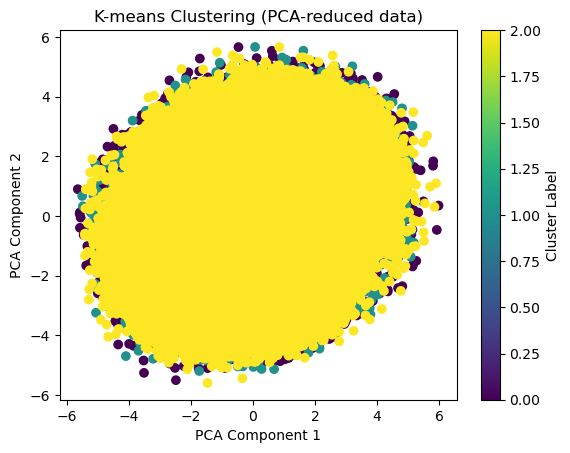

In [21]:
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=clusters, cmap='viridis', marker='o')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-means Clustering (PCA-reduced data)')
plt.colorbar(label='Cluster Label')
plt.show()

<Axes: >

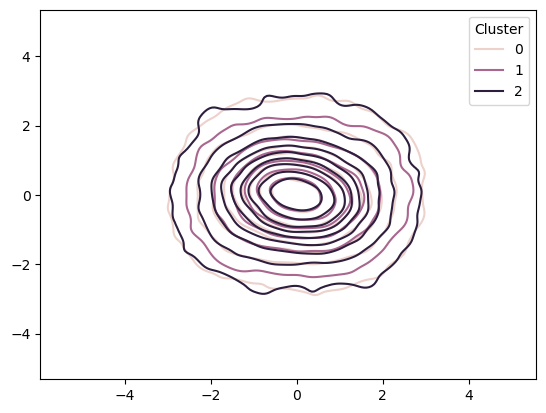

In [22]:
sns.kdeplot(x = data_pca[0::100, 0], y = data_pca[0::100, 1], hue=clusters[0::100])

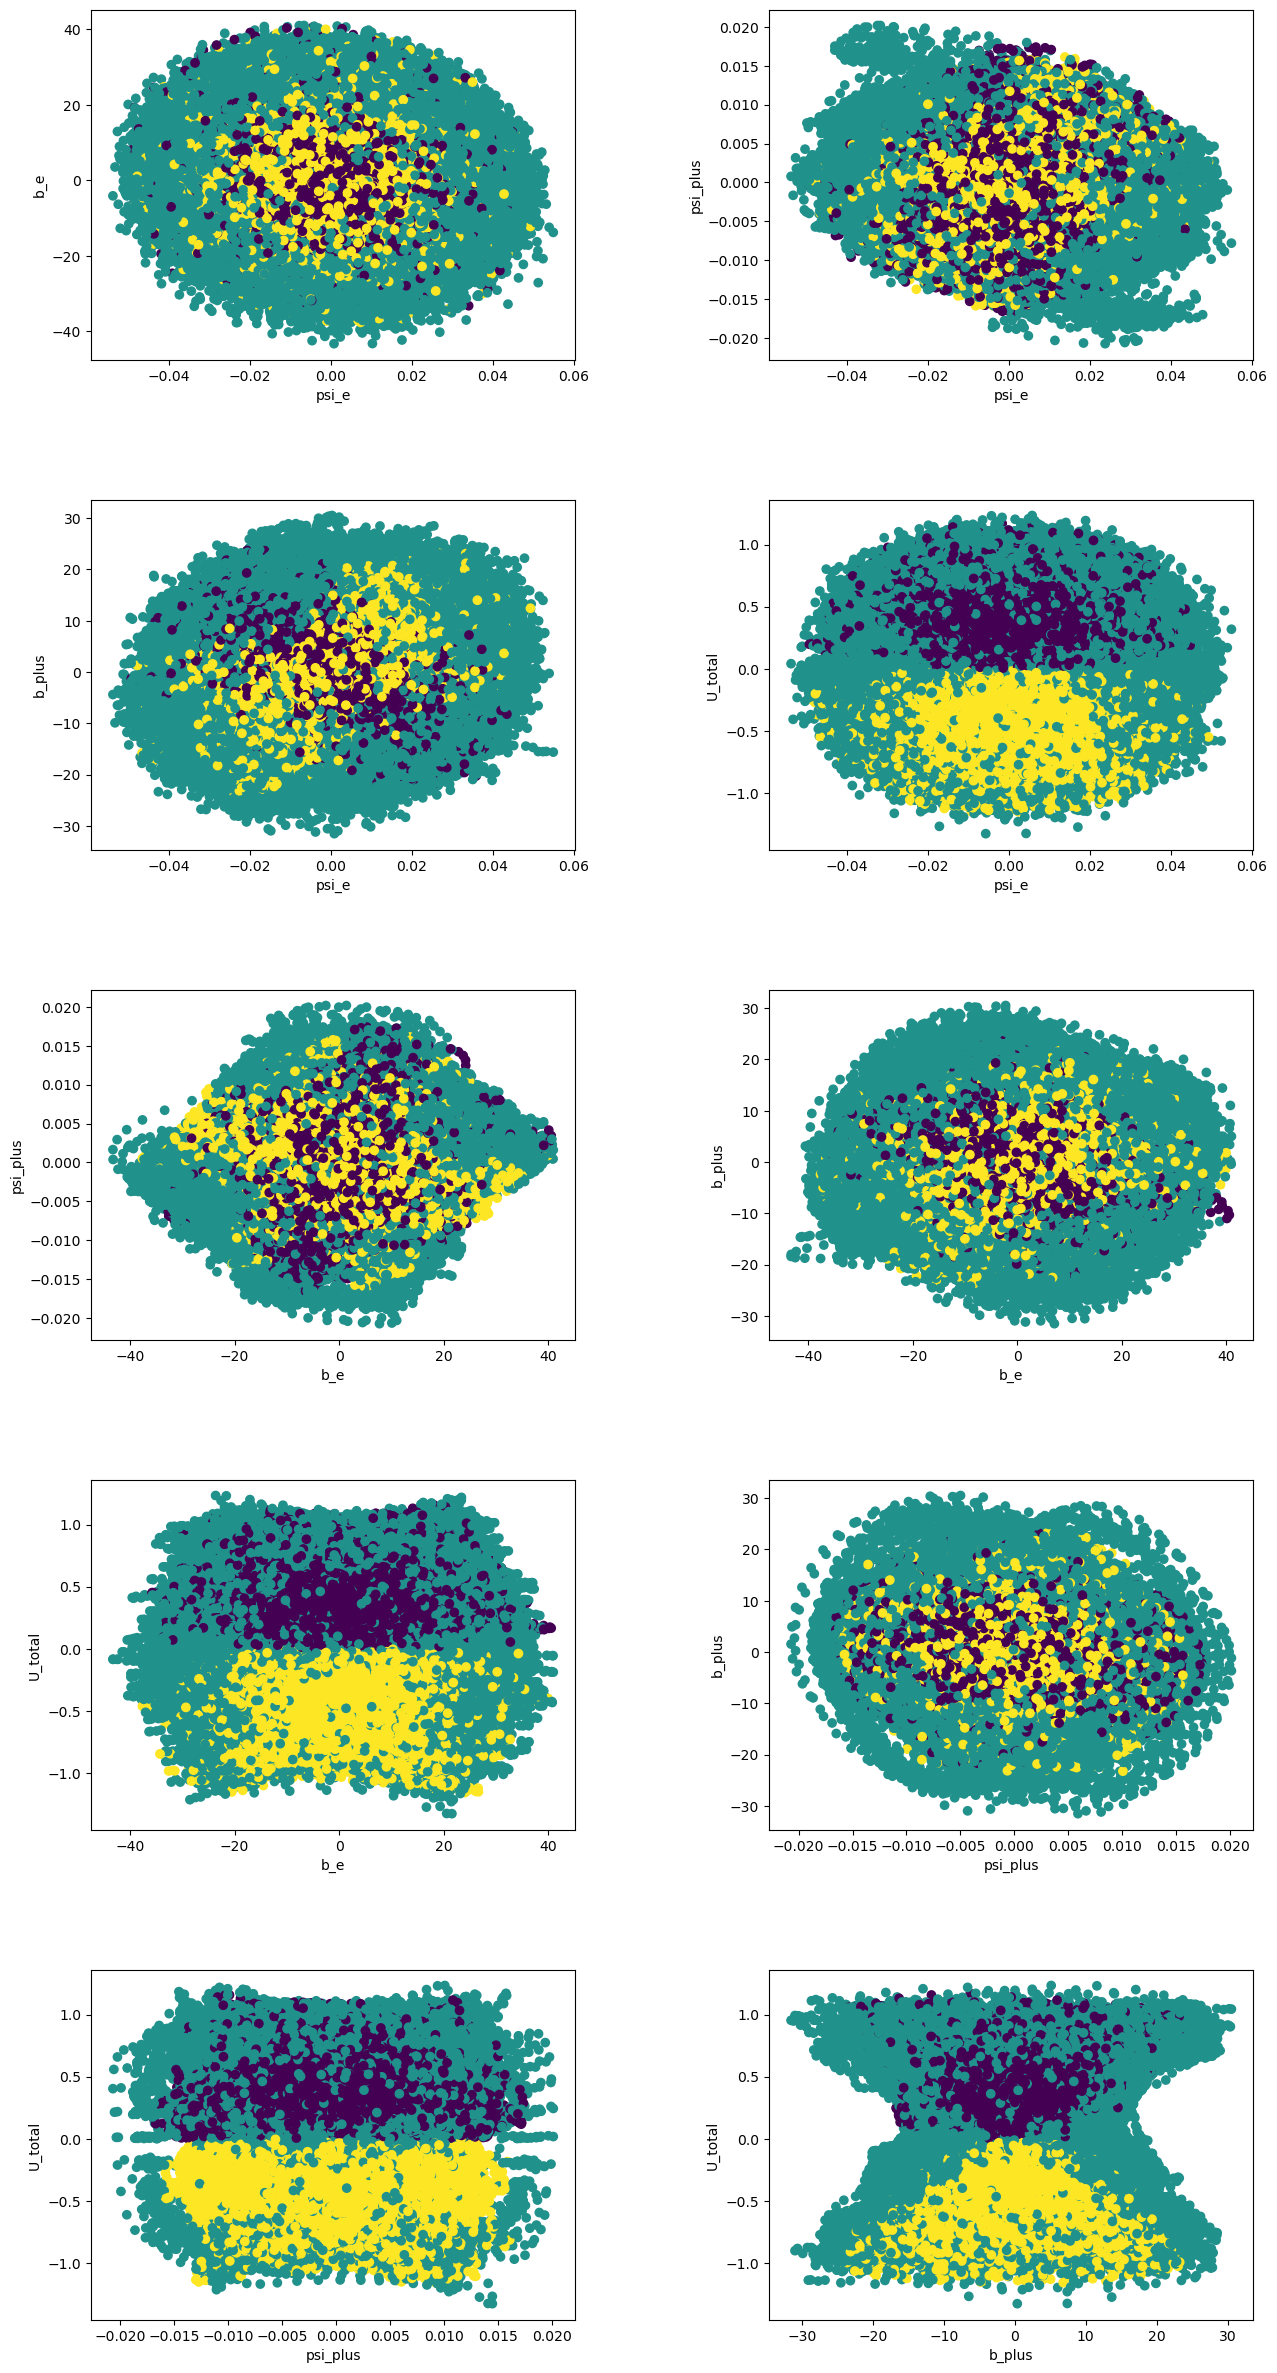

In [23]:
data = data_combined_df
clusters = data['Cluster']

fig, axs = plt.subplots(5, 2, figsize=(15, 30))

axs[0, 0].scatter(data.iloc[:, 0], data.iloc[:, 1], c=clusters)
axs[0, 0].set_xlabel('psi_e')
axs[0, 0].set_ylabel('b_e')

axs[0, 1].scatter(data.iloc[:, 0], data.iloc[:, 2], c=clusters)
axs[0, 1].set_xlabel('psi_e')
axs[0, 1].set_ylabel('psi_plus')

axs[1, 0].scatter(data.iloc[:, 0], data.iloc[:, 3], c=clusters)
axs[1, 0].set_xlabel('psi_e')
axs[1, 0].set_ylabel('b_plus')

axs[1, 1].scatter(data.iloc[:, 0], data.iloc[:, 4], c=clusters)
axs[1, 1].set_xlabel('psi_e')
axs[1, 1].set_ylabel('U_total')

axs[2, 0].scatter(data.iloc[:, 1], data.iloc[:, 2], c=clusters)
axs[2, 0].set_xlabel('b_e')
axs[2, 0].set_ylabel('psi_plus')

axs[2, 1].scatter(data.iloc[:, 1], data.iloc[:, 3], c=clusters)
axs[2, 1].set_xlabel('b_e')
axs[2, 1].set_ylabel('b_plus')

axs[3, 0].scatter(data.iloc[:, 1], data.iloc[:, 4], c=clusters)
axs[3, 0].set_xlabel('b_e')
axs[3, 0].set_ylabel('U_total')

axs[3, 1].scatter(data.iloc[:, 2], data.iloc[:, 3], c=clusters)
axs[3, 1].set_xlabel('psi_plus')
axs[3, 1].set_ylabel('b_plus')

axs[4, 0].scatter(data.iloc[:, 2], data.iloc[:, 4], c=clusters)
axs[4, 0].set_xlabel('psi_plus')
axs[4, 0].set_ylabel('U_total')

axs[4, 1].scatter(data.iloc[:, 3], data.iloc[:, 4], c=clusters)
axs[4, 1].set_xlabel('b_plus')
axs[4, 1].set_ylabel('U_total')


plt.subplots_adjust(wspace=.4)
plt.subplots_adjust(hspace=.4)

plt.show()